In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('apples_and_oranges.csv')

In [3]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [4]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Weight    40 non-null int64
Size      40 non-null float64
Class     40 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


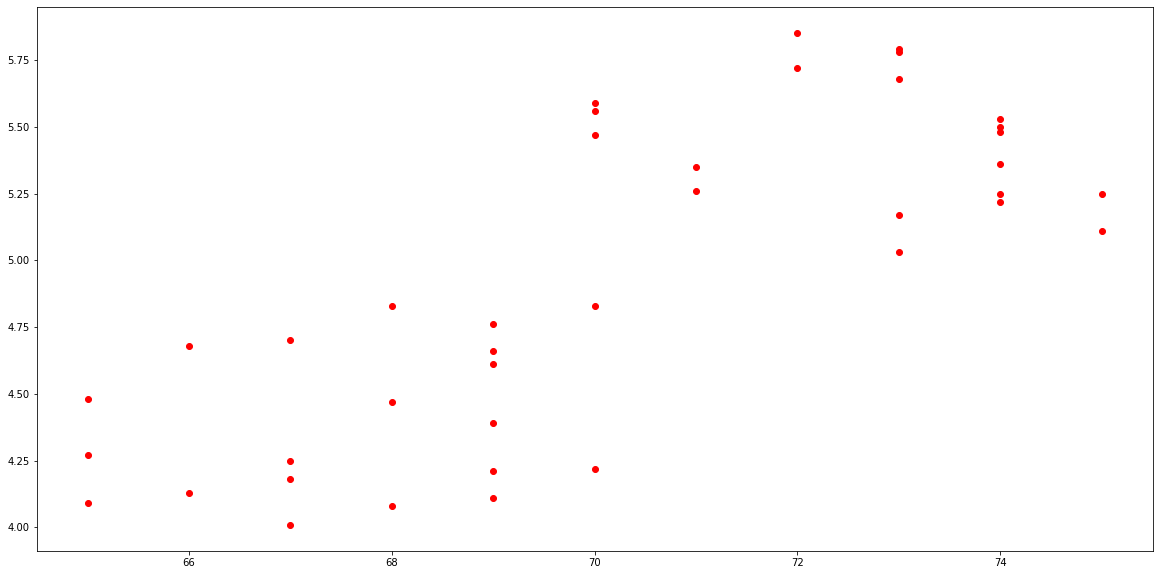

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Weight'], df['Size'], color=['red'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e6a8f0f10>,
      dtype=object)

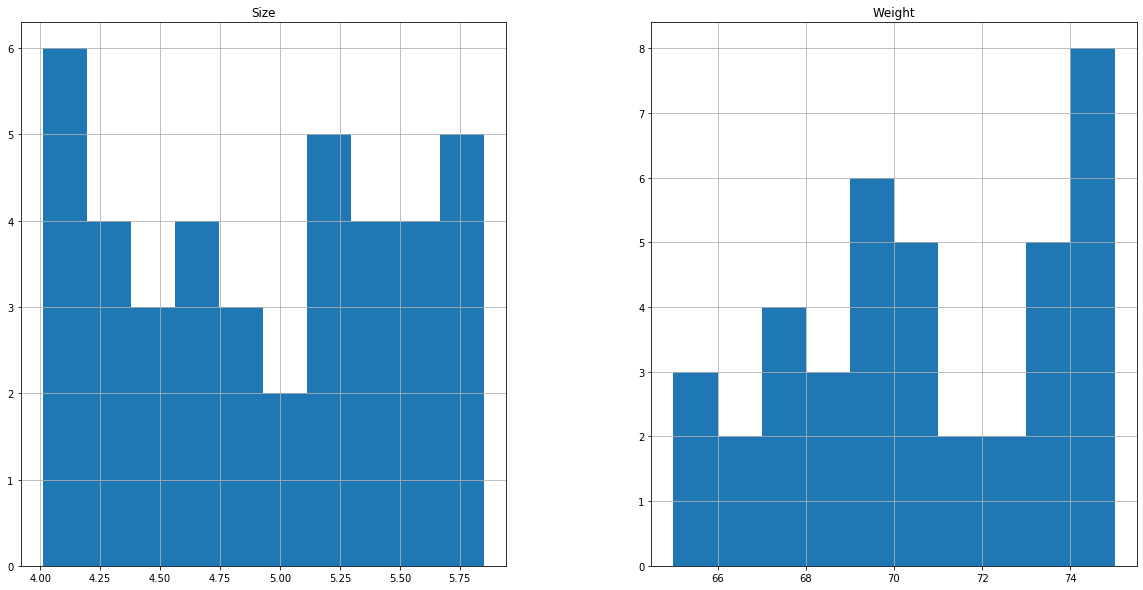

In [7]:
df.hist(figsize=(20, 10))

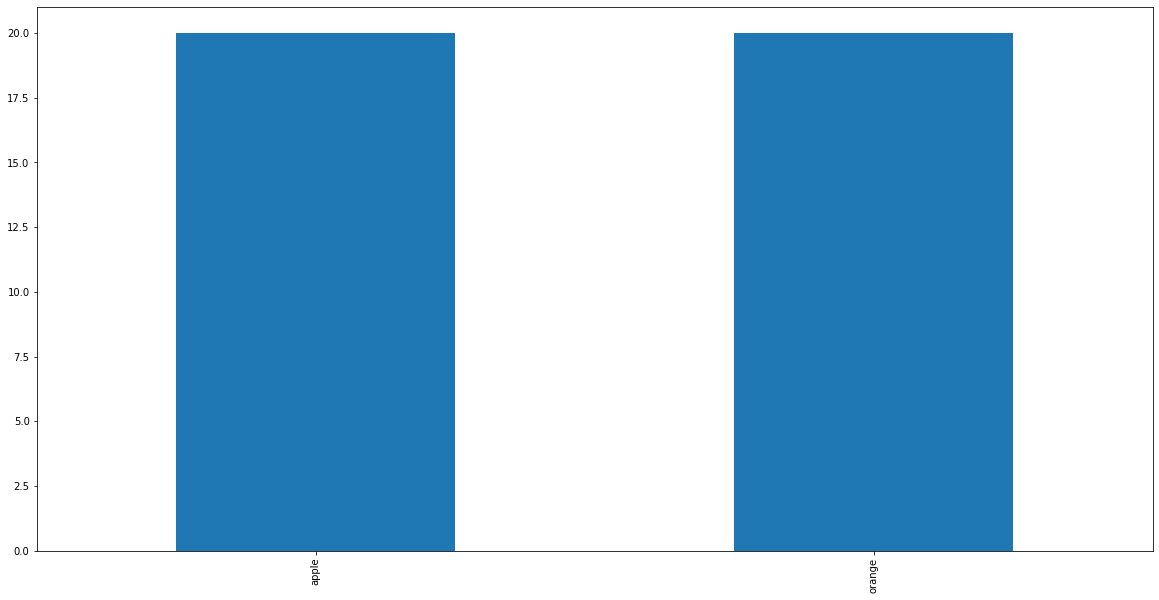

In [8]:
df['Class'].value_counts().plot(kind='bar', figsize=(20, 10))

In [9]:
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

In [10]:
X.shape

(40, 2)

In [11]:
y.shape

(40,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
df_sample = df[['Weight', 'Size']].sample(5)

In [18]:
sc_X = StandardScaler()
sample = sc_X.fit_transform(df_sample)
classifier.predict(sample)

array(['orange', 'orange', 'orange', 'orange', 'apple'], dtype=object)

In [19]:
df.iloc[list(df_sample.index)]

,Weight,Size,Class
9,65,4.27,orange
34,68,4.83,orange
22,69,4.61,orange
4,67,4.70,orange
5,73,5.68,apple


In [21]:
df_sample['Actual'] = df.iloc[list(df_sample.index)]['Class']
df_sample['Prediction'] = classifier.predict(sample)
df_sample

,Weight,Size,Actual,Prediction
9,65,4.27,orange,orange
34,68,4.83,orange,orange
22,69,4.61,orange,orange
4,67,4.70,orange,orange
5,73,5.68,apple,apple
